###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, T. Meier and R. Hartmann, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Korrelation von Signalen: Kreuz- und Autokorrelation 

Bisher haben wir die Ähnlichkeit von Zeitreihen über den Korrelationskoeffizienten bestimmt. Dabei wird allerdings vernachlässigt, daß einer Ursache nicht zwangsläufig sofort eine Wirkung folgen muß. So kann es zu Zeitverschiebungen zwischen zwei Zeitreihen kommen. Damit können zwei Zeitreihen eine Korrelation zeigen, welche der klassische Korrelationskoeffizient nicht registrieren kann. 

In dieser Vorlesung führen wir deshalb als Maß einer Korrelation von zwei Signalen gegenüber einer Zeitverschiebung die Kreuzkorrelationsfunktion (KKF) ein. Ähnliche oder periodisch wiederkehrende Signale innerhalb einer Zeitreihe lassen sich mit der Autokorrelationsfunktion (AKF) identifizieren.

## Kreuzkorrelationsfunktion (KKF) & Autokorrelationsfunktion (AKF)

Die **Kreuzkorrelationsfunktion (KKF)** beschreibt die Korrelation zweier Signale $x$ und $y$ bezüglich einer Zeitverschiebung (Englisch: time lag). Die KKF ist ein Maß für die Ähnlichkeit zweier Signale in Abhängigkeit von der Zeitverschiebung zwischen den Signalen. 

Seien $x(t)$ und $y(t)$ zwei kontinuierliche, deterministische Funktionen. Dann ist die **kontinuierliche KKF** bzgl. einer Zeitverschiebung $\tau\in\mathbb{R}$:

\begin{equation}
\rho_{x,y}(\tau)=\int\limits_{-\infty}^{\infty}x(t')\cdot y(t'+\tau)\mathrm{dt’} \notag
\end{equation}

Sind die Funktionen $x(t)$ und $y(t)$ auf einem bestimmten endlichen Beobachtungsintervall $[0,T]$ gegeben, normiert man häufig die KKF auf die Länge dieses Intervalls:

\begin{equation}
\rho_{x,y}(\tau)=\frac{1}{T}\int\limits_{0}^{T}x(t')\cdot y(t'+\tau)\mathrm{dt’} \notag
\end{equation}

Das Problem mit der kontinuierlichen KKF ist daß Computer aufgrund ihrer Architektur und begrenzten Speicherkapazität keine kontinuierlichen Zeitreihen speichern und verarbeiten können. Schon bei der Akquisition der Daten wird das Signal nur zu diskreten Zeiten 

$$t_j = j * dt$$

wobei $dt$ das Sampleintervall und $j$ den Zeitindex bezeichnen, auf der Festplatte des Computers gespeichert. Entsprechend müssen wir das kontinuierliche Integral in der KKF näherungsweise numerisch berechnen.

Die folgende Abbildung zeigt als Beispiel für eine vorgegebene Zeitverschiebung $\tau$ das Produkt der Zeitreihen $x(t')$ und $y(t'+\tau)$. Für die Berechnung der KKF müssen wir das Integral über diese Funktion, also die Fläche unter der Funktion berechnen.  

<img src="images/gauss_int_final.jpg" style="width: 800px;"/>

Wir erhalten eine sehr simple Näherung der Fläche unter der Funktion und damit des Integrals, indem wir die Fläche durch Rechtecke annähern. Deren Höhe wird durch den diskreten Funktionswert $\{x_j\}\{y_{j+k}\}$ vorgegeben. Hierbei bezeichnet $k\in\mathbb{N}$ eine Zeitindexverschiebung. Die Breite eines Rechtecks wird durch das konstante Zeitsampleintervall $dt$ vorgegeben. Die Fläche, z.b. des rot markierten Rechtecks, ergibt sich also zu 

$$A_j = x_{j} \cdot y_{j+k} \cdot dt$$

Das Integral der KKF läßt sich über die Summation aller Rechtecke näherungsweise berechnen:

$$\rho_{x,y}(\tau) \approx \sum\limits_{j=-\infty}^{\infty}x_{j} \cdot y_{j+k} \cdot dt$$

Da der Speicherplatz auf dem Rechner beschränkt ist und die meisten Zeitreihen ohnehin durch die Kausalität und maximale Aufzeichnungsdauer eines Signals nach unten und oben beschränkt sind, können wir die Summe auf eine endliche Anzahl von $N$ Indizes beschränken:

$$\rho_{x,y}(\tau) \approx \sum\limits_{j=1}^{N}x_{j} \cdot y_{j+k} \cdot dt$$

Da das Sampleintervall $dt$ konstant ist, kann man dieses vor die Summe ziehen

$$\rho_{x,y}(\tau) \approx dt \sum\limits_{j=1}^{N}x_{j} \cdot y_{j+k}$$

In den meisten Fällen interessiert man sich auch nicht für absolute Amplituden der KKF, so daß man den Faktor $dt$ häufig vernachlässigt:

$$\rho_{x,y}(\tau) \approx \sum\limits_{j=1}^{N}x_{j} \cdot y_{j+k}$$

Im Fall von diskreten, spikeartigen Signalen, welche effektiv keine Fläche abdecken, wie z.B. ein $\delta$-Impuls, tritt kein Faktor $dt$ auf. 

Seien also $\{x_j\}$ und $\{y_j\}$ zwei diskrete, deterministische Zeitreihen. Dann ist die **diskrete KKF** bzgl. einer Zeitindexverschiebung $k\in\mathbb{N}$:

\begin{equation}
\rho_{x,y}(k)=\sum\limits_{j}x_{j}\cdot y_{j+k} \notag
\end{equation}

Die **Autokorrelationsfunktion (AKF)** beschreibt den Spezialfall der Korrelation eines Signals $x$ mit sich selbst bezüglich einer Zeitverschiebung. Sie ist ein Maß für die Ähnlichkeit eines Signals mit sich selbst als Funktion der Zeitverschiebung oder auch ein Maß für die Abhängigkeit zukünftiger Werte von den aktuellen. 

Für $x=y$ ergibt sich aus der kontinuierlichen und diskreten KKF die entsprechende AKF des Signals $x$: 

\begin{equation}
\rho_{x,x}(k)=\sum\limits_{j}x_{j}\cdot x_{j+k} \notag
\end{equation}

bzw.

\begin{equation}
\rho_{x,x}(\tau)=\int\limits_{-\infty}^{\infty}x(t')\cdot x(t'+\tau)\mathrm{dt’} \notag
\end{equation}

Betrachten wir ein Beispiel für eine diskrete KKF. Dazu nehmen wir an, daß die Zeitreihe $x_j$ eine Länge von $T$ = 30 s besitzt und aus der ersten Ableitung der Gauss-Funktion mit einer dominanten Frequenz von $f_0$ = 1 Hz besteht:

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
import numpy                      # Bibliothek NumPy
from scipy import signal          # Bibliothek SciPy
from gsv.gsv_func import *        # Bibliothek "Geophysikalische Signalverarbeitung"

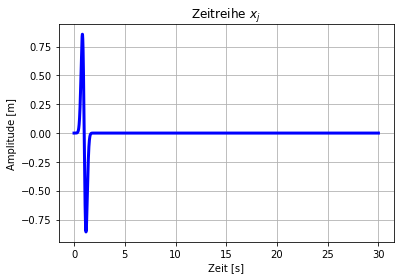

In [3]:
# Definiere Zeitreihe xj bestehend aus der ersten Ableitung der Gauss-Funktion
# ----------------------------------------------------------------------------
T = 30.     # Aufzeichnunsdauer [s]
f0 = 1     # dominante Frequenz [Hz]
time, xj = create_gauss_1st_derv(T,f0)

# Plotte erste Ableitung der Gaussfunktion
draw_func(time,xj,r'Zeitreihe $x_j$', 'Zeit [s]', 'Amplitude [m]')

Die Zeitreihe $y_j$ besteht aus einer Abfolge von ersten Ableitungen der Gaussfunktion, die allerdings relativ zur Zeitreihe $x_j$ zeitlich verschoben, der Amplitude mit einem Faktor -0.5, bzw. 0.25 multipliziert wurden:

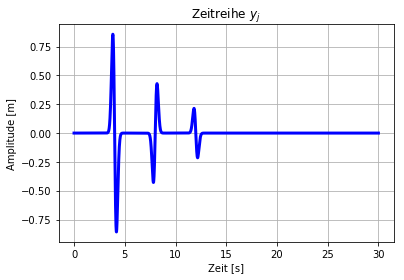

In [4]:
# Definiere Zeitreihe yj bestehend aus Abfolge von ersten Ableitungen der Gaussfunktion
# -------------------------------------------------------------------------------------
T = 30.     # Aufzeichnunsdauer [s]
f0 = 1     # dominante Frequenz [Hz]
time, yj = create_gauss_1st_derv_timeseries(T,f0)

# Plotte erste Ableitung der Gaussfunktion
draw_func(time,yj,r'Zeitreihe $y_j$', 'Zeit [s]', 'Amplitude [m]')

Im nächsten Schritt berechnen wir die diskrete KKF der Zeitreihen $x_j$ und $y_j$

\begin{equation}
\rho_{x,y}(k)=\sum\limits_{j}x_{j}\cdot y_{j+k} \notag
\end{equation}

mit der SciPy Funktion `signal.correlate`

In [5]:
# KKF der Rechteckfunktion
KKF_xy = signal.correlate(xj, yj, mode='same')

Um korrekte Amplituden zu erhalten, multiplizieren wir die KKF mit dem Sample-Intervall $dt$

In [6]:
# Bestimme Sample-Intervall dt und multipliziere mit KKF_xy
# um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
KKF_xy = KKF_xy * dt

Bei vielen Matlab und Python Beispielen zur Berechnung der KKF wird diese einfach unter die Zeitreihe geplottet. Dabei darf man nicht vergessen, daß die Zeitreihen $x_j$ und $y_j$ über der Zeit aufgetragen werden, die KKF dagegen über den Time-lags.

Im Fall von Matlab wird ein time-lag Vektor zurückgegeben. Bei der SciPy Funktion `signal.correlate` muß man dagegen wissen, daß bei $N$ Zeitsamples in jeder Zeitreihe Lags zwischen $-N/2:N/2$ berechnet werden. Entsprechend ergeben sich die Time-lags zu:

In [7]:
# Berechne time-lags
nt = len(KKF_xy)                    # Anzahl der Samples der KKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

Schließlich folgt als Ergebnis der KKF:

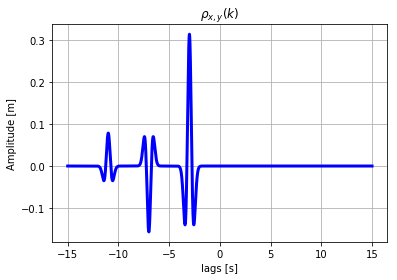

In [8]:
# Plotte Ergebnis der KKF_xy
draw_func(lags,KKF_xy,r'$\rho_{x,y}(k)$', 'lags [s]', 'Amplitude [m]')

Das Ergebnis zeigt starke Korrelationen bei negativen time-lags. Dies läßt sich dadurch erklären daß wir die Zeitreihe $y_j$ um negative Zeitindizes verschieben müssen, um deren Signal mit der ersten Ableitung der Gaussfunktion in der Zeitreihe $x_j$ korrelieren zu können.

Die Maxima der KKF bei einem Lag von -3 s, -7 s und -11 s entsprechen genau der Zeitdifferenz zwischen der ersten Ableitung der Gaussfunktion in der Zeitreihe $x_j$ und den entsprechenden Einsätzen der Wellenformen in der Zeitreihe $y_j$.

Man beachte daß bei dem mittleren Einsatz (lag = -7 s) eine Antikorrelation vorliegt.

## Kreuzkovarianz- & Autokovarianzfunktion

Das stochastische Analogon zur KKF bzw. AKF ist die (Kreuz- bzw. Auto-) **Kovarianzfunktion**:

Seien $\{x_j\}$ und $\{y_j\}$ bzw. $x(t)$ und $y(t)$ stochastische Prozesse mit

$E[x_j],E[y_j],E[x(t)],E[y(t)]=0$ 

und 

$E[x_j^2],E[y_j^2],E[x^2(t)],E[y^2(t)]<\infty$.

Dann gilt für die **Kreuzkovarianz**:

\begin{equation}
\begin{split}
\mathrm{Cov}(x_{j},y_{j+k})&=E[x_j\cdot y_{j+k}]:=\rho_{x,y}(j,j+k)\\
&\text{bzw.}\\
\mathrm{Cov}(x(t_0),y(t_0+\tau))&=E[x(t_0)\cdot y(t_0+\tau)]:=\rho_{x,y}(t_0,t_0+\tau).
\end{split}
\notag
\end{equation}

Für schwach stationäre Prozesse ist die Kreuzkovarianzfunktion nur von der Zeitverschiebung und nicht von der Referenzzeit abhängig. Dann gilt weiter:

\begin{equation}
\begin{split}
\rho_{x,y}(j,j+k)&:=\rho_{x,y}(k)\\
&\text{bzw.}\\
\rho_{x,y}(t_0,t_0+\tau)&:=\rho_{x,y}(\tau).
\end{split}
\notag
\end{equation}

Für $\{x_j\}=\{y_j\}$ bzw. $x(t)=y(t)$ ergeben sich analog die diskreten, bzw. kontinuierlichen **Autokovarianzfunktionen**

## AKF bei Nullzahliger Verschiebung

Für alle Funktionen $x:\;\mathbb{R}\to\mathbb{R}$ gilt für deren AKF:

\begin{equation}
\rho_{x,x}(0)=||x||_{2} \notag
\end{equation}

Bei nullzahliger Verschiebung ergibt die AKF die $L_{2}$-Norm der Funktion $x$.

**Beweis:**

\begin{equation*}
\rho_{x,x}(0)=\int\limits_{\mathbb{R}}x(t^{\prime})x(t^{\prime}-0)\mathrm{dt^{\prime}}=\int\limits_{\mathbb{R}}x(t^{\prime})^{2}\mathrm{dt^{\prime}}=:||x||_{2}
\end{equation*}

Dies gilt analog für den diskreten Fall.

## AKF eines zeitverschobenen Signals

1. Seien $x,y:\;\mathbb{R}\to\mathbb{R}$ kontinuierliche Funktionen der Zeit $t$, wobei $y(t)=x(t-t_{0})$ die um die Zeit $t_{0}\in\mathbb{R}$ verschobene Funktion von $x(t)$ ist. Dann gilt für alle die AKF der Funktionen:

\begin{equation}
\rho_{y,y}(t)=\rho_{x,x}(t) \notag
\end{equation}

**Beweis:**

\begin{equation*}
\rho_{y,y}(t)=\int\limits_{\mathbb{R}}x(t^{\prime}-t_{0})x(t^{\prime}-t_{0}+t)\mathrm{dt}^{\prime}
\underset{t^{\prime\prime}=t^{\prime}-t_{0}}{=}
\int\limits_{\mathbb{R}}x(t^{\prime\prime})x(t^{\prime\prime}+t)\mathrm{dt}^{\prime\prime}=\rho_{x,x}(t)
\end{equation*}

2. Dies gilt analog für den diskreten Fall.

## Normierte KKF, AKF, Kreuz- & Autokovarianz

1. Normierte KKF und normierte Kreuzkovarianz lauten:

\begin{equation}
\tilde{\rho}_{x,y}(t)=\frac{\rho_{x,y}(t)}{\sqrt{\rho_{x,x}(0)\cdot\rho_{y,y}(0)}}\in[-1,1] \notag
\end{equation}

2. Normierte AKF und normierte Autokovarianz lauten:

\begin{equation}
\tilde{\rho}_{x,x}(t)=\frac{\rho_{x,x}(t)}{\rho_{x,x}(0)}\in[-1,1] \notag
\end{equation}

Dabei gilt: $t=\begin{cases}k\in\mathbb{N}&:x,y\text{ diskret}\\\tau\in\mathbb{R}&:x,y\text{ kontinuierlich}\end{cases}$

## Schätzung der Kreuz- & Autokovarianzfunktionen

1. Kreuz- und Autokovarianzfunktionen können auf Grund des [Gesetzes der großen Zahlen](https://de.wikipedia.org/wiki/Gesetz_der_gro%C3%9Fen_Zahlen)  wieder mithilfe des Mittelwerts von $N$ diskreten Realisierungen geschätzt werden:

\begin{equation}
\hat{\rho}_{x,y}(k)=\frac{1}{N-k}\sum\limits_{j=1}^{N-k}x_j\cdot y_{j+k} \notag
\end{equation}

2. Diese Schätzung der Kreuz- und Autokovarianzfunktionen ist erwartungstreu. Dazu betrachtet man den Erwartungswert der Schätzung: 

\begin{equation}
E[\hat{\rho}_{x,y}(k)]=\frac{1}{N-k}\sum\limits_{j=1}^{N-k}E[x_{j}\cdot y_{j+k}]=\frac{N-k}{N-k}\rho_{x,y}(k)=\rho_{x,y}(k).\notag
\end{equation}

Sie ist gleich der gesuchten Kreuzkovarianzfunktion. 

## Beziehungen zwischen Korrelation und Faltung

Seien $x(t)$ und $y(t)$ zwei kontinuierliche Funktionen, dann ist 

$x(t) \ast y(t)=\int_{\mathbb{R}}x(t’)\cdot y(t’-t)\mathrm{dt}’$ 

deren **Faltung** und 

$\rho_{x,y}(t)=\int_{\mathbb{R}}x(t’)\cdot y(t’+t)\mathrm{dt}’$ 

deren **KKF**. 

Dann gilt:

1. Die Faltung ist kommutativ:

\begin{equation}
x(t)\ast y(t)=y(t)\ast x(t) \notag
\end{equation}

2. Die KKF ist nicht kommutativ:

\begin{equation}
\rho_{x,y}(t)=\rho_{y,x}(-t) \notag
\end{equation}

3. Der Zusammenhang zwischen KKF und Faltung lautet:

\begin{equation}
\rho_{x,y}(t)=x(-t)\ast y(t) \notag
\end{equation}

4. Die AKF ist immer symmetrisch:

\begin{equation}
\rho_{x,x}(t)=\rho_{x,x}(-t) \notag
\end{equation}

5. Das Spektrum der Faltung lautet:

\begin{equation}
\mathfrak{F}\{x(t)\ast y(t)\}=X(\omega)\;Y(\omega)=|X(\omega)|\;|Y(\omega)|\;\exp(\varphi_{x}(\omega)+\varphi_{y}(\omega)) \notag
\end{equation}

6. Das Spektrum der KKF lautet:

\begin{equation}
\mathfrak{F}\{\rho_{x,y}(t)\}=X^{\ast}(\omega)\;Y(\omega)=|X(\omega)|\;|Y(\omega)|\;\exp(\varphi_{y}(\omega)-\varphi_{x}(\omega)) \notag
\end{equation}

Man beachte den Vorzeichenwechsel im Phasenspektrum. Das Amplitudenspektrum der Faltung und der KKF unterscheidet sich dagegen nicht.

7. Das Spektrum der AKF bildet dann das Powerspektrum:

\begin{equation}
\mathfrak{F}\{\rho_{x,x}(t)\}=|X(\omega)|^{2}. \notag
\end{equation}

Die AKF ist nullphasig und somit unabhängig vom Phasenspektrum des Signals. Sie ist nur vom Amplitudenspektrum des Signals abhängig.